In [ ]:
import pandas as pdz
df = pdz.read_csv('melb_data.csv')
#analyze the data
print(df.head())
print(df.info())
print(df.describe())

       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

In [4]:
missing_values = df.isnull().sum()
print(missing_values)

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


In [10]:
# Fill Car column with mode
car_mode = df['Car'].mode()[0]
df['Car'] = df['Car'].fillna(car_mode)

# Fill CouncilArea column with mode
council_mode = df['CouncilArea'].mode()[0]
df['CouncilArea'] = df['CouncilArea'].fillna(council_mode)

# Fill BuildingArea column with mean
building_mean = df['BuildingArea'].mean()
df['BuildingArea'] = df['BuildingArea'].fillna(building_mean)

# Fill YearBuilt column with median
year_median = df['YearBuilt'].median()
df['YearBuilt'] = df['YearBuilt'].fillna(year_median)

missing_values = df.isnull().sum()
print(missing_values)

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


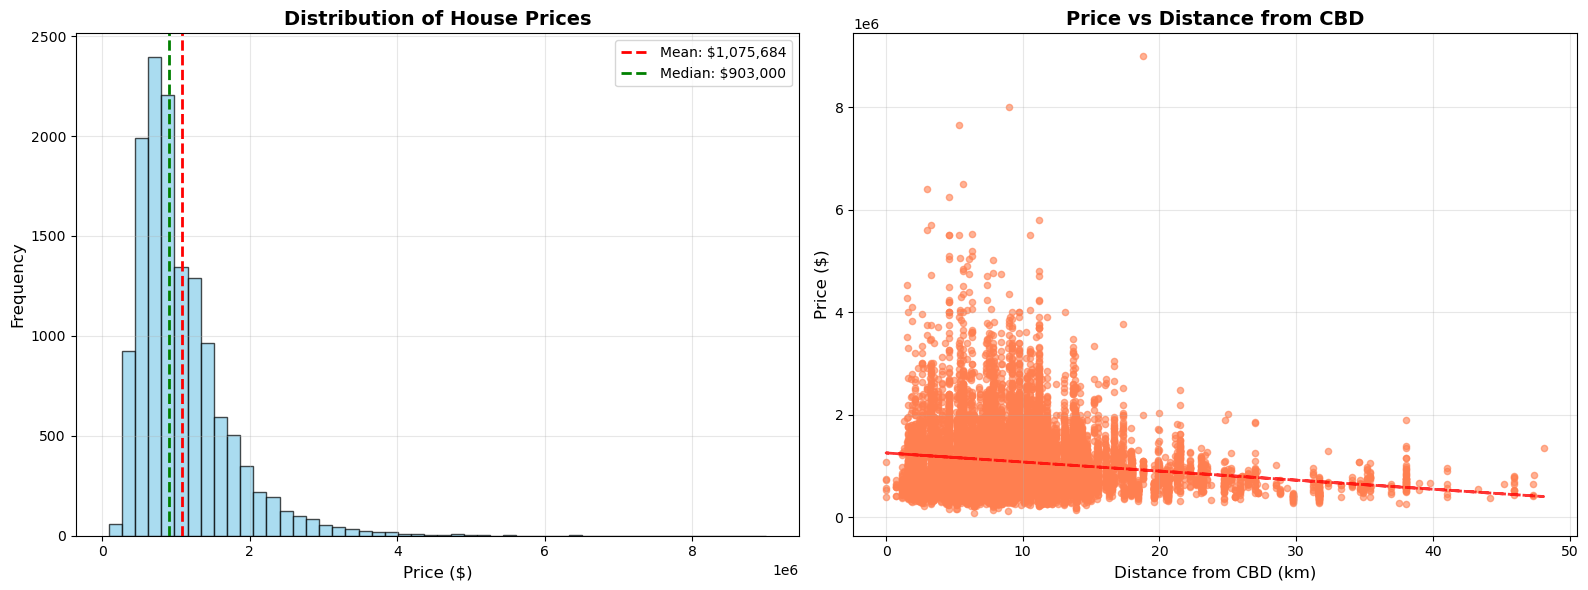

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Histogram of Price column with statistics
ax1.hist(df['Price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(df['Price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["Price"].mean():,.0f}')
ax1.axvline(df['Price'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${df["Price"].median():,.0f}')
ax1.set_title('Distribution of House Prices', fontsize=14, fontweight='bold')
ax1.set_xlabel('Price ($)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Scatter plot of Price vs Distance with trend line
ax2.scatter(df['Distance'], df['Price'], alpha=0.6, color='coral', s=20)
# Add trend line
z = np.polyfit(df['Distance'], df['Price'], 1)
p = np.poly1d(z)
ax2.plot(df['Distance'], p(df['Distance']), "r--", alpha=0.8, linewidth=2)
ax2.set_title('Price vs Distance from CBD', fontsize=14, fontweight='bold')
ax2.set_xlabel('Distance from CBD (km)', fontsize=12)
ax2.set_ylabel('Price ($)', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()